In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 11

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 11)                121       
                                                                 
Total params: 1191 (4.65 KB)
Trainable params: 1191 (4.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 99/101 [============================>.] - ETA: 0s - loss: 2.3673 - accuracy: 0.1473
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


C:\Users\amang\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


101/101 [==============================] - 4s 16ms/step - loss: 2.3656 - accuracy: 0.1487 - val_loss: 2.2179 - val_accuracy: 0.2734
Epoch 2/1000
 98/101 [============================>.] - ETA: 0s - loss: 2.1597 - accuracy: 0.2536
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 11ms/step - loss: 2.1581 - accuracy: 0.2534 - val_loss: 1.9031 - val_accuracy: 0.3594
Epoch 3/1000
 99/101 [============================>.] - ETA: 0s - loss: 1.9294 - accuracy: 0.3321
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 10ms/step - loss: 1.9281 - accuracy: 0.3322 - val_loss: 1.6335 - val_accuracy: 0.4950
Epoch 4/1000
 96/101 [===========================>..] - ETA: 0s - loss: 1.7626 - accuracy: 0.3873
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 11ms/step - loss: 1.7594 - accuracy:

101/101 [==============================] - ETA: 0s - loss: 1.0774 - accuracy: 0.6191
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 9ms/step - loss: 1.0774 - accuracy: 0.6191 - val_loss: 0.5729 - val_accuracy: 0.8742
Epoch 29/1000
 98/101 [============================>.] - ETA: 0s - loss: 1.0762 - accuracy: 0.6207
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 9ms/step - loss: 1.0767 - accuracy: 0.6205 - val_loss: 0.5712 - val_accuracy: 0.8767
Epoch 30/1000
 92/101 [==========================>...] - ETA: 0s - loss: 1.0579 - accuracy: 0.6249
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 9ms/step - loss: 1.0620 - accuracy: 0.6246 - val_loss: 0.5527 - val_accuracy: 0.8770
Epoch 31/1000
 96/101 [===========================>..] - ETA: 0s - loss: 1.0430 - accuracy: 0

Epoch 55/1000
 93/101 [==========================>...] - ETA: 0s - loss: 0.9459 - accuracy: 0.6626
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 10ms/step - loss: 0.9465 - accuracy: 0.6626 - val_loss: 0.4385 - val_accuracy: 0.9189
Epoch 56/1000
 93/101 [==========================>...] - ETA: 0s - loss: 0.9307 - accuracy: 0.6693
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 10ms/step - loss: 0.9272 - accuracy: 0.6697 - val_loss: 0.4254 - val_accuracy: 0.9182
Epoch 57/1000
 95/101 [===========================>..] - ETA: 0s - loss: 0.9368 - accuracy: 0.6645
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 12ms/step - loss: 0.9351 - accuracy: 0.6646 - val_loss: 0.4341 - val_accuracy: 0.9098
Epoch 58/1000
 99/101 [============================>.] - ETA: 0s - loss: 0.9

Epoch 82/1000
101/101 [==============================] - ETA: 0s - loss: 0.8798 - accuracy: 0.6869
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 10ms/step - loss: 0.8798 - accuracy: 0.6869 - val_loss: 0.3841 - val_accuracy: 0.9408
Epoch 83/1000
100/101 [============================>.] - ETA: 0s - loss: 0.8699 - accuracy: 0.6893
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 10ms/step - loss: 0.8702 - accuracy: 0.6890 - val_loss: 0.3772 - val_accuracy: 0.9450
Epoch 84/1000
 97/101 [===========================>..] - ETA: 0s - loss: 0.8731 - accuracy: 0.6927
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 9ms/step - loss: 0.8722 - accuracy: 0.6928 - val_loss: 0.3916 - val_accuracy: 0.9431
Epoch 85/1000
100/101 [============================>.] - ETA: 0s - loss: 0.87

101/101 [==============================] - 1s 9ms/step - loss: 0.8567 - accuracy: 0.6940 - val_loss: 0.4010 - val_accuracy: 0.9322
Epoch 109/1000
 92/101 [==========================>...] - ETA: 0s - loss: 0.8375 - accuracy: 0.7006
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 10ms/step - loss: 0.8399 - accuracy: 0.6999 - val_loss: 0.3795 - val_accuracy: 0.9424
Epoch 110/1000
 94/101 [==========================>...] - ETA: 0s - loss: 0.8429 - accuracy: 0.6987
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 8ms/step - loss: 0.8443 - accuracy: 0.6978 - val_loss: 0.3901 - val_accuracy: 0.9345
Epoch 111/1000
 96/101 [===========================>..] - ETA: 0s - loss: 0.8393 - accuracy: 0.6973
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
101/101 [==============================] - 1s 9ms/step - loss: 0.8370 - 

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

34/34 [==============================] - 0s 4ms/step - loss: 0.3838 - accuracy: 0.9448


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 267ms/step
[2.6941049e-01 1.4284625e-02 4.9579737e-01 7.1193988e-08 8.9497837e-07
 1.9007920e-04 7.5008087e-02 1.4528836e-01 8.1703993e-06 1.5450186e-14
 1.1854735e-05]
2


# Confusion matrix

135/135 [==============================] - 1s 4ms/step


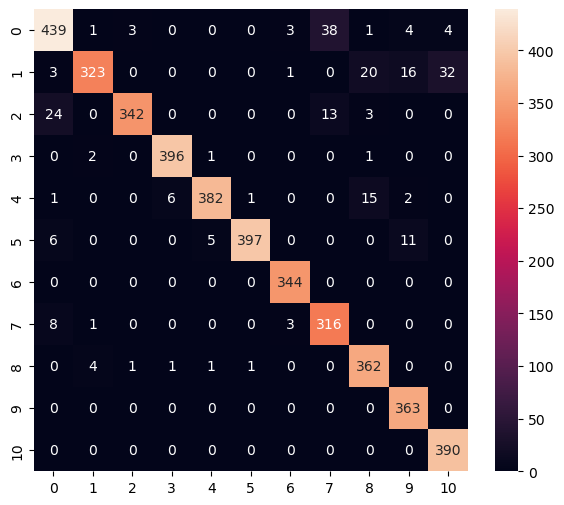

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       493
           1       0.98      0.82      0.89       395
           2       0.99      0.90      0.94       382
           3       0.98      0.99      0.99       400
           4       0.98      0.94      0.96       407
           5       0.99      0.95      0.97       419
           6       0.98      1.00      0.99       344
           7       0.86      0.96      0.91       328
           8       0.90      0.98      0.94       370
           9       0.92      1.00      0.96       363
          10       0.92      1.00      0.96       390

    accuracy                           0.94      4291
   macro avg       0.95      0.95      0.95      4291
weighted avg       0.95      0.94      0.94      4291



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\amang\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\amang\AppData\Local\Temp\tmpkpcf8l7u\assets


INFO:tensorflow:Assets written to: C:\Users\amang\AppData\Local\Temp\tmpkpcf8l7u\assets


6852

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.6941049e-01 1.4284642e-02 4.9579737e-01 7.1194123e-08 8.9498008e-07
 1.9007920e-04 7.5008124e-02 1.4528832e-01 8.1704147e-06 1.5450303e-14
 1.1854779e-05]
2
